### (c) Igor Sokolov

In [84]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import pandas as pd
import matplotlib
from matplotlib import patches
from sympy import *
import datetime
from functools import reduce
from sklearn.datasets import make_spd_matrix, make_sparse_spd_matrix
import scipy

from scipy.optimize import minimize, root_scalar

import sys
import os

import itertools
from scipy.special import binom
from scipy.stats import ortho_group

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import sklearn.metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

from itertools import cycle
from contextlib import redirect_stdout
from functools import reduce

In [23]:
from logreg_functions import *

### Do a dataset preprocessing

In [82]:
%%bash
python3 generate_data.py --dataset mushrooms --loss_func log-reg --homogeneous 1

(8124,) [ 1.  1.  1. -1.  1.]
Data shape:  (8124, 112)


### Generate the script

In [129]:
project_path = os.getcwd() + "/"
experiment_name_ar = ["local_spider_homo"]
dataset_ar = ["mushrooms"]

batch_ar = [20, 50, 100]
LAUNCH_NUMBERS = 2
launch_number_ar = np.arange (1, LAUNCH_NUMBERS)
num_workers_ar = [20, 50, 100]
#num_workers_ar = [20]
num_local_steps_ar = [10, 20, 30, 50, 100 ]
#num_local_steps_ar = [10]
tol = 1e-12
release = True
max_it = 100
is_continue = 0


shell_script_name = "local_spider1"

with open(shell_script_name + ".sh", 'w') as f:
    with redirect_stdout(f):
        #print ("%%bash")
        print ("#!/bin/bash")

        for launch_number in launch_number_ar:
            for i, (experiment_name, dataset, num_workers, num_local_steps, batch_size ) in \
            enumerate (itertools.product (experiment_name_ar, dataset_ar, num_workers_ar, num_local_steps_ar, batch_ar)):
                print ("python3 {0}.py --dataset {1} --num_workers {2} --num_local_steps {3} --batch_size {4} --continue {5} --max_it {6} --launch_number {7} --tol {8}".
                format(experiment_name, dataset, num_workers, num_local_steps, batch_size , is_continue, max_it, launch_number, tol))

                #show the script
f = open(shell_script_name + ".sh", 'r')
print (f.read())
f.close()



#!/bin/bash
python3 local_spider_homo.py --dataset mushrooms --num_workers 20 --num_local_steps 10 --batch_size 20 --continue 0 --max_it 100 --launch_number 1 --tol 1e-12
python3 local_spider_homo.py --dataset mushrooms --num_workers 20 --num_local_steps 10 --batch_size 50 --continue 0 --max_it 100 --launch_number 1 --tol 1e-12
python3 local_spider_homo.py --dataset mushrooms --num_workers 20 --num_local_steps 10 --batch_size 100 --continue 0 --max_it 100 --launch_number 1 --tol 1e-12
python3 local_spider_homo.py --dataset mushrooms --num_workers 20 --num_local_steps 20 --batch_size 20 --continue 0 --max_it 100 --launch_number 1 --tol 1e-12
python3 local_spider_homo.py --dataset mushrooms --num_workers 20 --num_local_steps 20 --batch_size 50 --continue 0 --max_it 100 --launch_number 1 --tol 1e-12
python3 local_spider_homo.py --dataset mushrooms --num_workers 20 --num_local_steps 20 --batch_size 100 --continue 0 --max_it 100 --launch_number 1 --tol 1e-12
python3 local_spider_homo.py --d

In [114]:
%%bash

bash local_spider.sh

2020-08-20 16:53:34
local_spider_homo_10_20_10


Traceback (most recent call last):
  File "local_spider_homo.py", line 272, in <module>
    V = sample_matrix_logreg_sgrad(W, X, y, la, i_batch) - sample_matrix_logreg_sgrad(W_prev, X, y, la, i_batch)  + V_prev # (7th)
  File "/Users/igorsokolov/Google_Drive/Sirius 2020/log_reg_experiment/logreg_functions.py", line 88, in sample_matrix_logreg_sgrad
    V[i] = sample_logreg_sgrad(W[i], X, y, la, i_batch)
  File "/Users/igorsokolov/Google_Drive/Sirius 2020/log_reg_experiment/logreg_functions.py", line 73, in sample_logreg_sgrad
    return np.sum(logreg_sgrad(w, X[i_batch], y[i_batch], la))/len(i_batch) + la * regularizer_grad(w)
  File "/Users/igorsokolov/Google_Drive/Sirius 2020/log_reg_experiment/logreg_functions.py", line 48, in logreg_sgrad
    loss_sgrad = - y_i * x_i / (1 + np.exp(y_i * np.dot(x_i, w)))
ValueError: operands could not be broadcast together with shapes (10,) (10,112) 


CalledProcessError: Command 'b'\nbash local_spider.sh\n'' returned non-zero exit status 1.

### plot 

In [152]:
def myrepr(x):
    return repr(round(x, 2)).replace('.',',') if isinstance(x, float) else repr(x)

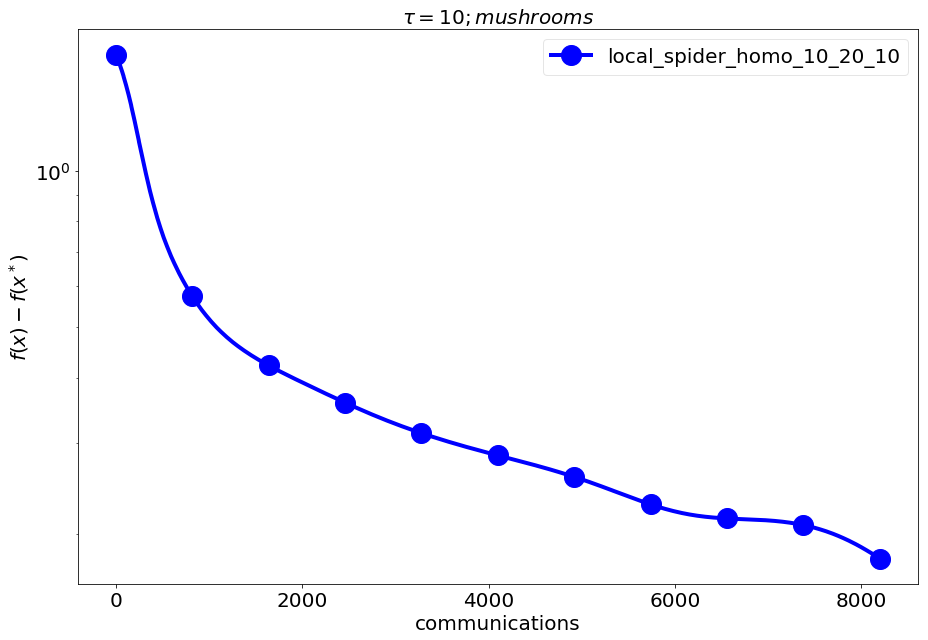

In [158]:
# upload whole data
def export_legend(legend, filename="legend.pdf", expand=[-5, -5, 5, 5]):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)


project_path = os.getcwd() + "/"

experiment_name_ar = ["local_spider_homo"]
dataset_ar = ["mushrooms"]
loss_func = "log-reg"

batch_ar = [10]
LAUNCH_NUMBERS = 2
launch_number_ar = np.arange(1, LAUNCH_NUMBERS)
# num_workers_ar = [20, 50, 100]
num_workers_ar = [20]
# num_local_steps_ar = [10, 20, 30, 50, 100 ]
num_local_steps_ar = [10]
tol = 1e-12
release = True
max_it = 100
is_continue = 0

w_init = {}
la_ar = {}
info_num_ar = {}
loss_ar = {}
epochs_ar = {}
its_comm_ar = {}
f_grad_norms_ar = {}
label_ar = {}

experiment_name = "local_spider_homo"

experiments = []
for i, (experiment_name, dataset, num_workers, num_local_steps, batch_size) in \
        enumerate(itertools.product(experiment_name_ar, dataset_ar, num_workers_ar, num_local_steps_ar, batch_ar)):

    if experiment_name in experiments:
        continue
    else:
        experiments.append(experiment_name)

    experiment = '{0}_{1}_{2}_{3}'.format(experiment_name, batch_size, num_workers, num_local_steps)

    id_label = experiment
    label = id_label

    id_str = "{0}_{1}".format(dataset, experiment)  #####
    id_func = "{0}_{1}".format(dataset, loss_func)  #####
    id_dataset = "{0}".format(dataset)  #####

    logs_path = project_path + "logs1_{0}_{1}/".format(dataset, experiment)
    data_path = project_path + "data_{0}/".format(dataset)
    plot_path = project_path + "plot_{0}/".format(dataset)

    if os.path.exists(plot_path) == False:
        os.mkdir(plot_path)

    if os.path.isfile(data_path + 'data_info.npy'):
        data_info = np.load(data_path + 'data_info.npy')
        L = data_info[0]
    else:
        raise ValueError("cannot load data_info.npy")

    if os.path.isfile(logs_path + 'norms' + "_" + experiment + ".npy"):
        f_grad_norms_ar[id_str] = np.load(logs_path + 'norms' + '_' + experiment + ".npy")
    else:
        raise ValueError("cannot load norms info")

    if os.path.isfile(logs_path + 'communication' + "_" + experiment + ".npy"):
        its_comm_ar[id_str] = np.load(logs_path + 'communication' + '_' + experiment + ".npy")
    else:
        raise ValueError("cannot load communication info")

    if os.path.isfile(logs_path + 'loss' + "_" + experiment + ".npy"):
        loss_ar[id_str] = np.load(logs_path + 'loss' + '_' + experiment + ".npy")
        # print(id_str, loss_ar[id_str].shape)
    else:
        print(id_str)
        raise ValueError("cannot load loss info")

    if os.path.isfile(logs_path + 'epochs' + "_" + experiment + ".npy"):
        epochs_ar[id_str] = np.load(logs_path + 'epochs' + '_' + experiment + ".npy")
    else:
        raise ValueError("cannot load epochs info")

    # print (label)
    label_ar[id_label] = label

keys = list(label_ar.keys())
# print (len(keys))

values_all_posible = ["o", "*", "v", "^", "<", ">", "s", "p", "P", "h", "H", "+", "x", "X", "D", "d", "|", "_"]

len_batch_ar = len(batch_ar)
n_experiments_per_plot = int(len(experiments) / len_batch_ar)

values = values_all_posible[:n_experiments_per_plot]
values = reduce(lambda x, y: x + y, [[values[i]] * len_batch_ar for i in range(len(values))])

marker_ar = dict(zip(keys, values))

colors_all_posible = ['blue', 'red', 'orange', 'aqua', 'violet', 'darkorange',
                      'cornflowerblue', 'darkgreen',
                      'coral', 'lime',
                      'darkgreen', 'goldenrod', 'maroon',
                      'black', 'brown', 'yellowgreen'
                      ]

colors = colors_all_posible[:n_experiments_per_plot]
colors = reduce(lambda x, y: x + y, [[colors[i]] * len_batch_ar for i in range(len(colors))])

color_ar = dict(zip(keys, colors))

# what dow you want to show in the plot

colors = ['blue', 'red', 'orange', 'aqua', 'violet', 'darkorange',
          'cornflowerblue', 'darkgreen',
          'coral', 'lime',
          'darkgreen', 'goldenrod', 'maroon',
          'black', 'brown', 'yellowgreen'
          ]

tol = 1e-8
x_axis = "iter"

n_iter_ar = {}
n_iter_time_ar = {}  # here I store x_axis for time = time in sec
for j, batch in enumerate(batch_ar):
    n_iter = []
    for i, (experiment_name, dataset, num_workers, num_local_steps, batch_size) in \
            enumerate(itertools.product(experiment_name_ar, dataset_ar, num_workers_ar, num_local_steps_ar, batch_ar)):

        experiment = '{0}_{1}_{2}_{3}'.format(experiment_name, batch_size, num_workers, num_local_steps)

        id_label = experiment
        id_str = "{0}_{1}".format(dataset, experiment)
        label = id_label
        n_iter.append(its_comm_ar[id_str].shape[0])

    #n_iter_ar[batch] = int(1.2 * min(n_iter))

experiments = []
fig = plt.figure()

####################################################################################################################################################################################
legend_data = []
line_labels = []
marker_size = 20

for j, batch in enumerate(batch_ar):
    for i, (experiment_name, dataset, num_workers, num_local_steps, batch_size) in \
            enumerate(itertools.product(experiment_name_ar, dataset_ar, num_workers_ar, num_local_steps_ar, batch_ar)):

        # print (experiment_name, dataset, loss_func, sampling_kind, step_type, batch)

        if experiment_name in experiments:
            continue
        else:
            experiments.append(experiment_name)

        experiment = '{0}_{1}_{2}_{3}'.format(experiment_name, batch_size, num_workers, num_local_steps)

        id_label = experiment
        label = id_label

        id_str = "{0}_{1}".format(dataset, experiment)  #####
        id_func = "{0}_{1}".format(dataset, loss_func)  #####
        id_dataset = "{0}".format(dataset)  #####

        logs_path = project_path + "logs1_{0}_{1}/".format(dataset, experiment)
        data_path = project_path + "data_{0}/".format(dataset)


        if x_axis == "epochs":
            plt.xlabel('epochs')
            if ((id_str in epochs_ar) and id_str in loss_ar):

                markers_on = its_comm_ar[id_str][its_comm_ar[id_str] % 20000 == 0]

                plt.plot(epochs_ar[id_str], f_grad_norms_ar[id_str], color=color_ar[id_label], marker=marker_ar[id_label],
                         markersize=marker_size, markevery=list(markers_on), label=label_ar[id_label])
            else:
                raise ValueError("can not plot")
        elif x_axis == "iter":
            plt.xlabel('communications')
            if ((id_str in its_comm_ar) and id_str in loss_ar):

                markers_on = its_comm_ar[id_str][its_comm_ar[id_str] % (int(len(its_comm_ar[id_str][:-(1 + 2 * i)]) / 10)) == 0]
                legend_data.append(
                    plt.plot(its_comm_ar[id_str], f_grad_norms_ar[id_str], color=color_ar[id_label], marker=marker_ar[id_label],
                             markersize=marker_size, markevery=list(markers_on), label=label_ar[id_label])[0])
                line_labels.append(label_ar[id_label])
            else:
                raise ValueError("can not plot")



    plt.rcParams["figure.figsize"] = [26, 20]
    #plt.rcParams["figure.figsize"] = [26, 20]
    
    if j == 0:
        plt.ylabel(r"$f(x) - f(x^*)$")

    size = 20
    title = r"${0}$".format(loss_func)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 4
    # plt.rcParams['lines.markersize'] = 10
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = size  # 30

    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size  # 40
    plt.rcParams["figure.figsize"] = [13,9]
    plt.yscale('log')
    # plt.xscale('log')
    dataset = "mushrooms"
    plt.title(r"$\tau = {0}; {1}$".format(batch, dataset))
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(1, 4))
    #plt.ticklabel_format(axis='x', style='sci', scilimits=(1, 4))
    #

    plt.tight_layout()
    plot_path = project_path + "plot_{0}/".format(dataset)
    
    legend = plt.legend(loc="upper right", framealpha=0.5)
    
    #legend = plt.legend(loc="lower center", framealpha=0.5, ncol=3, bbox_to_anchor=(0.45, -1.2))
    plt.savefig(plot_path + "{0}_{1}_{2}_{3}_{4}_{5}.pdf".format('-'.join(experiment_name_ar), '-'.join(list(map(str,batch_ar))),
                                                         '-'.join(list(map(str,num_workers_ar))), '-'.join(list(map(str,num_local_steps_ar))),
                                                                 x_axis, loss_func))
    plt.show()
    # plt.savefig(plot_path + "{0}_{1}_{2}_{3}.pdf".format('-'.join(experiment_name_ar), x_axis, loss_func, batch))
    #export_legend(legend)

# plt.savefig(plot_path + "{0}_{1}_{2}.pdf".format('-'.join(experiment_name_ar), x_axis, loss_func))


# plt.plot()